## Introduction to ARIMA
#### What is ARIMA?
ARIMA stands for AutoRegressive Integrated Moving Average. It is a class of statistical models designed for analyzing and forecasting time series data.  
ARIMA models are built upon three key components:

1. **AutoRegressive (AR)**: This refers to the model's ability to predict future values based on past values. It uses a linear combination of lagged observations.
2. **Integrated (I)**: This refers to the differencing of raw observations to make the time series stationary (i.e., the mean, variance, and autocorrelation structure of the series do not change over time).
3. **Moving Average (MA)**: This involves modeling the error of the forecast as a linear combination of error terms from past time steps.

These components are combined into a single model represented as ARIMA **(p,d,q)**, where:

1. $p$: The number of lag observations included in the AR model (autoregressive terms).
2. $d$: The degree of differencing required to make the series stationary.
3. $q$: The size of the moving average window (moving average terms).

#### What Does ARIMA Solve?
ARIMA is designed to solve forecasting problems for time series data. It provides a method to predict future values based on patterns and relationships within the historical data.

##### Typical problems ARIMA addresses include:
1. Forecasting future sales or demand.
2. Predicting stock prices or economic indicators.
3. Anticipating seasonal trends in temperature, rainfall, or traffic.

##### When Should ARIMA Be Used?
1. **The data is a time series**: ARIMA is specifically for data points recorded in sequential time order.
2. **There is a need for accurate forecasts**: It’s particularly effective for series that are autocorrelated (past values influence future values).
3. **The series is stationary or can be made stationary**: ARIMA assumes the series has a constant mean and variance over time. Non-stationary series can often be transformed using differencing.
4. **There are no clear seasonal effects**: For data with strong seasonal patterns, the Seasonal ARIMA (SARIMA) extension is often better.


#### What is a Time Series?
A time series is a sequence of data points measured at successive points in time, typically at regular intervals. Examples include:

1. Daily temperature measurements.
2. Monthly sales revenue.
3. Hourly website traffic.

Time series data has 4 key components:

1. **Trend**: The long-term direction of the data (e.g., increasing, decreasing, or constant over time).
2. **Seasonality**: Recurring patterns or cycles over a fixed period (e.g., sales increasing every December).
3. **Noise**: Random variations in the data.
4. **Cyclic patterns**: Fluctuations that are not tied to a fixed calendar period.

##### What is Stationarity?
A stationary time series has statistical properties that remain **constant** over time. Specifically:

1. The mean does not change over time.
2. The variance remains constant.
3. The autocorrelation structure does not change.
##### Why is Stationarity Important?
ARIMA models work under the assumption that the input time series is stationary. If your data isn’t stationary, ARIMA will struggle to provide accurate forecasts.

##### How to Test for Stationarity
There are two common ways to check if a time series is stationary:

1. **Visual Inspection**: Plot the time series. If you observe trends or changing variances, the series is likely not stationary.
2. **Statistical Tests**: Augmented Dickey-Fuller (ADF) test: A hypothesis test where the null hypothesis is that the series is not stationary.

##### Making a Time Series Stationary
If the data is not stationary, there are techniques to make it stationary:
1. **Differencing**: 
    1. Subtract the previous observation from the current observation.
    2. This helps remove trends and makes the data more stable.

2. **Log Transformation**: 
    1. Applying a logarithm can stabilize the variance.

3. **Detrending**:
    1. Remove the trend component explicitly (e.g., by subtracting a fitted trend line).

4. **Seasonal Differencing**:
    1. Subtract the value from the same season in the previous cycle.

**Example of Differencing**:  
Suppose you have the following series: $[10,12,14,16,18]$  
The differenced series becomes: $[12−10,14−12,16−14,18−16] = [2,2,2,2]$  
Now the series is stationary because it has a constant mean (2).  

##### p, d and q
Selecting appropriate values for the p, d, and q parameters is critical for building an effective ARIMA model.  
This process involves analyzing the autocorrelation and partial autocorrelation plots of the time series data to identify the appropriate values for p and q.  
The value of d is determined based on the number of differencing steps needed to achieve stationarity.  
Generally, if the data is stationary, the value of d is 0, and if the data is not stationary, the value of d is 1.

## Main Task 
Analyzing and Forecasting the reach of a professional social media account.

Analyzing and forecasting the reach of a professional social media account can help the content creator plan and optimize their social media strategy.  
By knowing the expected reach of their Instagram account, they can plan the timing and content of their posts to maximize engagement and grow their followers.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [3]:
dataset = pd.read_csv("Dataset/Instagram-Reach.csv")

In [4]:
dataset.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


In [5]:
# Extracting only date values from the 'date' column.
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [6]:
dataset.head()

,Date,Instagram reach
0,2022-04-01,7620
1,2022-04-02,12859
2,2022-04-03,16008
3,2022-04-04,24349
4,2022-04-05,20532


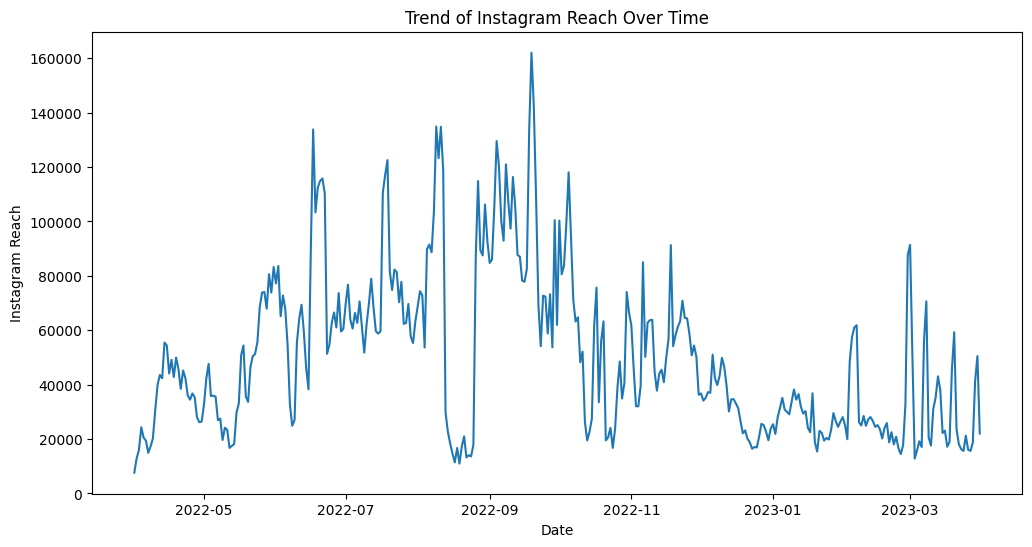

In [7]:
# Visualizing the trend of the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataset, x='Date', y='Instagram reach')
plt.title('Trend of Instagram Reach Over Time')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.show()

> You can see that this data is not stationary, and it’s not appropriate to use the ARIMA model on such data.

In [8]:
# Resetting index
time_series = dataset.set_index('Date')['Instagram reach']

In [9]:
# For making the time series stationary.
# DIFFERENCING
differenced_series = time_series.diff().dropna()

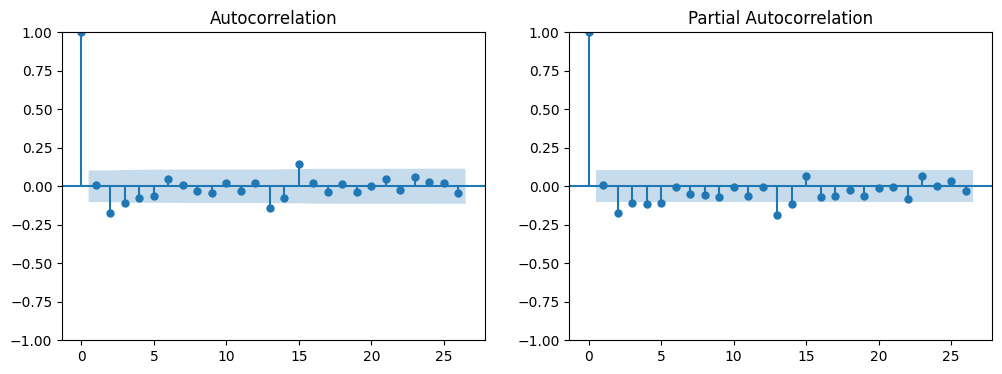

In [10]:
# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

> In the above graphs, the ACF plot cuts off at lag 1, indicating **q = 1**. The PACF plot also cuts off at lag 1, indicating **p = 1**

In [ ]:
p, d, q = 1, 1, 1 # d = 1 because the data is non-stationary
model = ARIMA(time_series, order=(p, d, q))
results = model.fit()

In [12]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:        Instagram reach   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4026.336
Date:                Tue, 24 Dec 2024   AIC                           8058.672
Time:                        14:37:07   BIC                           8070.364
Sample:                    04-01-2022   HQIC                          8063.319
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7791      0.046     17.084      0.000       0.690       0.869
ma.L1         -0.9607      0.022    -44.607      0.000      -1.003      -0.918
sigma2      2.559e+08   2.81e-11   9.11e+18      0.0

1. **Setting the index**: You set the 'Date' column as the index, which is essential for time series analysis.

2. **Differencing**: You used diff() to calculate the difference between consecutive observations, and dropped the NA values. This is a common technique to achieve stationarity in a time series.

3. **ARIMA model**: You've specified the order of the ARIMA model as (1, 1, 1), where p=1 (autoregressive part), d=1 (degree of differencing), and q=1 (moving average part).

In [13]:
# Predict future values
future_steps = 100
predictions = results.predict(len(time_series), len(time_series) + future_steps - 1)
print(predictions)

2023-04-01    23434.362336
2023-04-02    24541.004435
2023-04-03    25403.218747
2023-04-04    26074.992866
2023-04-05    26598.389961
                  ...     
2023-07-05    28444.663140
2023-07-06    28444.663140
2023-07-07    28444.663140
2023-07-08    28444.663140
2023-07-09    28444.663140
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


### Introduction to SARIMA (Seasonal ARIMA)
While ARIMA is powerful for time series forecasting, it does not handle seasonal patterns directly.  
When your data exhibits regular and repeating patterns over fixed intervals (e.g., sales peaking every December or traffic increasing every weekend), you need to extend ARIMA to Seasonal ARIMA (SARIMA).  

#### What is SARIMA?
SARIMA stands for Seasonal AutoRegressive Integrated Moving Average. It builds on ARIMA by adding components that specifically model seasonal effects.  
SARIMA is represented as: $$\text{SARIMA}(p, d, q) × (P, D, Q, s)$$
**Where:**  
1. $p, d, q$: The non-seasonal ARIMA parameters.
2. $P, D, Q$: The seasonal ARIMA parameters.
3. $s$: The length of the seasonal cycle (e.g., 12 for monthly data with yearly seasonality).

#### Seasonal Components
The seasonal components $(P, D, Q, s)$ mirror  the non-seasonal ones but operate on the seasonal period $s$.  
1. **Seasonal AutoRegressive $(P)$**:  
    1. Captures relationships between observations from the same point in previous seasons.
    2. E.g., sales this December depend on sales last December.

2. **Seasonal Differencing $(D)$**: 
    1. Removes seasonal trends by differencing data with the same point in the previous season.
    2. E.g., $Y_t - Y_{t - s}$ where $s = 12$ for monthly data.

3. **Seasonal Moving Average $(Q)$**:
    1. Models the relationship between forecast errors and errors from previous seasons.
    2. E.g., an error in December may influence future Decembers.

#### How SARIMA Works
SARIMA combines non-seasonal and seasonal effects into **a unified model**. The equations extend ARIMA to include both regular and seasonal terms.    
For example, SARIMA $(1, 1, 1) × (1, 1, 1, 12)$:  

1. **Non-seasonal** ARIMA(1, 1, 1):
    1. $p = 1$: One non-seasonal autoregressive term.
    2. $d = 1$: First differencing to make the series stationary.
    3. $q = 1$: One non-seasonal moving average term.

2. **Seasonal** ARIMA(1, 1, 1, 12):
    1. $P = 1$: One seasonal autoregressive term (yearly).
    2. $D = 1$: Seasonal differencing (year-over-year changes).
    3. $Q = 1$: One seasonal moving average term.
    4. $s = 12$: Seasonal period (e.g., 12 months for yearly data).

#### When to Use SARIMA?
1. **Seasonality is evident**: The data shows clear and repeating seasonal patterns. E.g., electricity usage spikes every winter.
2. **Seasonal patterns affect future predictions**: Ignoring seasonality would result in inaccurate forecasts.
3. **You want a unified model**: SARIMA integrates both seasonal and non-seasonal components, eliminating the need for external adjustments.

In [14]:
# Import SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
p, d, q, s = 1, 1, 1, 12

sarima_model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(p, d, q, s))
sarima_results = sarima_model.fit()

In [18]:
print(sarima_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3944.546
Date:                            Tue, 24 Dec 2024   AIC                           7899.092
Time:                                    15:42:20   BIC                           7918.410
Sample:                                04-01-2022   HQIC                          7906.779
                                     - 03-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7847      0.086      9.116      0.000       0.616       0.953
ma.L1         -0.9596      0.045   

The value of s in SARIMA represents the seasonal period or the number of time steps in each seasonal cycle. In time series data, seasonality often occurs at regular intervals.  
For example, in monthly data, the seasonality repeats every 12 months, while in daily data, it may repeat every 7 days (weekly seasonality) or every 30 days (monthly seasonality).

In the provided SARIMA example, the value of s is set to 12, indicating that the time series data exhibits seasonality with a repeating pattern every 12-time steps.  
It typically corresponds to a seasonal cycle of 12 months, suggesting that the data has **yearly seasonality**.

### ARIMA 
In simple words, it looks at how past observations influence future ones. The Integrated (I) component involves differencing the time series data to make it stationary. Stationarity is a critical assumption for ARIMA models. The moving Average (MA) part models the relationship between the current value and past forecast errors. It helps account for short-term fluctuations in the data. 

### SARIMA
SARIMA extends ARIMA by including seasonal components to account for seasonality in the data. Seasonal patterns are often observed in many time series data, such as quarterly sales or monthly temperature data.